In [164]:
import os
from pathlib import Path
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

In [144]:
plt.style.use('seaborn')

In [145]:
%matplotlib inline

In [152]:
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()
df_stations = pd.read_csv(os.path.join(p_cwd,"data","de_phen_stations.csv"))

In [153]:
df_stations.head()

s_id       lon      lat                                   name
0     1   9.43333  54.7667  Flensburg, kreisfreie Stadt Flensburg
1     2  10.15000  54.4000                             Kiel-Pries
2     3  10.15000  54.3333                      Kiel-Düsternbrook
3     4  10.05000  54.3167                         Kiel-Mettenhof
4     5  10.68330  53.8833                        Lübeck-Schlutup

In [154]:
gdf = gpd.GeoDataFrame(
     df_stations, geometry=gpd.points_from_xy(df_stations.lon, df_stations.lat))

In [155]:
gdf.crs = "WGS84"

In [156]:
gdf

s_id       lon      lat                                   name  \
0         1   9.43333  54.7667  Flensburg, kreisfreie Stadt Flensburg   
1         2  10.15000  54.4000                             Kiel-Pries   
2         3  10.15000  54.3333                      Kiel-Düsternbrook   
3         4  10.05000  54.3167                         Kiel-Mettenhof   
4         5  10.68330  53.8833                        Lübeck-Schlutup   
...     ...       ...      ...                                    ...   
6768  21528  14.06670  52.5500               Buckow/M?rkische Schweiz   
6769  21529  12.10000  54.1000                      Rostock-Gehlsdorf   
6770  21530  12.23330  51.8000                             Dessau-S?d   
6771  21531  10.40000  50.7500                                 He?les   
6772  21532  10.01670  48.8000                               Essingen   

                       geometry  
0      POINT (9.43333 54.76670)  
1     POINT (10.15000 54.40000)  
2     POINT (10.15000 54.33330)  
3     POINT (10.05000 54.31670)  
4     POINT (10.68330 53.88330)  
...                         ...  
6768  POINT (14.06670 52.55000)  
6769  POINT (12.10000 54.10000)  
6770  POINT (12.23330 51.80000)  
6771  POINT (10.40000 50.75000)  
6772  POINT (10.01670 48.80000)  

[6773 rows x 5 columns]

In [157]:
gdf_trans = gdf.to_crs(epsg=3857)

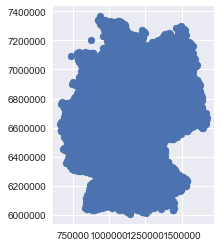

In [158]:
gdf_trans.plot()

In [159]:
gdf_trans

s_id       lon      lat                                   name  \
0         1   9.43333  54.7667  Flensburg, kreisfreie Stadt Flensburg   
1         2  10.15000  54.4000                             Kiel-Pries   
2         3  10.15000  54.3333                      Kiel-Düsternbrook   
3         4  10.05000  54.3167                         Kiel-Mettenhof   
4         5  10.68330  53.8833                        Lübeck-Schlutup   
...     ...       ...      ...                                    ...   
6768  21528  14.06670  52.5500               Buckow/M?rkische Schweiz   
6769  21529  12.10000  54.1000                      Rostock-Gehlsdorf   
6770  21530  12.23330  51.8000                             Dessau-S?d   
6771  21531  10.40000  50.7500                                 He?les   
6772  21532  10.01670  48.8000                               Essingen   

                             geometry  
0     POINT (1050113.492 7316718.361)  
1     POINT (1129892.832 7246278.442)  
2     POINT (1129892.832 7233533.743)  
3     POINT (1118760.882 7230365.113)  
4     POINT (1189259.516 7148085.618)  
...                               ...  
6768  POINT (1565897.881 6900190.041)  
6769  POINT (1346965.839 7189117.891)  
6770  POINT (1361804.727 6764043.361)  
6771  POINT (1157722.704 6577190.192)  
6772  POINT (1115053.943 6240993.463)  

[6773 rows x 5 columns]

In [160]:
gdf_trans.describe()

s_id          lon          lat
count   6773.000000  6773.000000  6773.000000
mean    3809.075447    10.156156    51.023460
std     3429.782583     2.035877     1.771747
min        1.000000     5.983330    47.400000
25%     1699.000000     8.583330    49.683300
50%     3395.000000    10.050000    51.016700
75%     5093.000000    11.666700    52.316700
max    21532.000000    15.033300    55.016700

In [161]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  # Remove the CWD from sys.path while we load stuff.


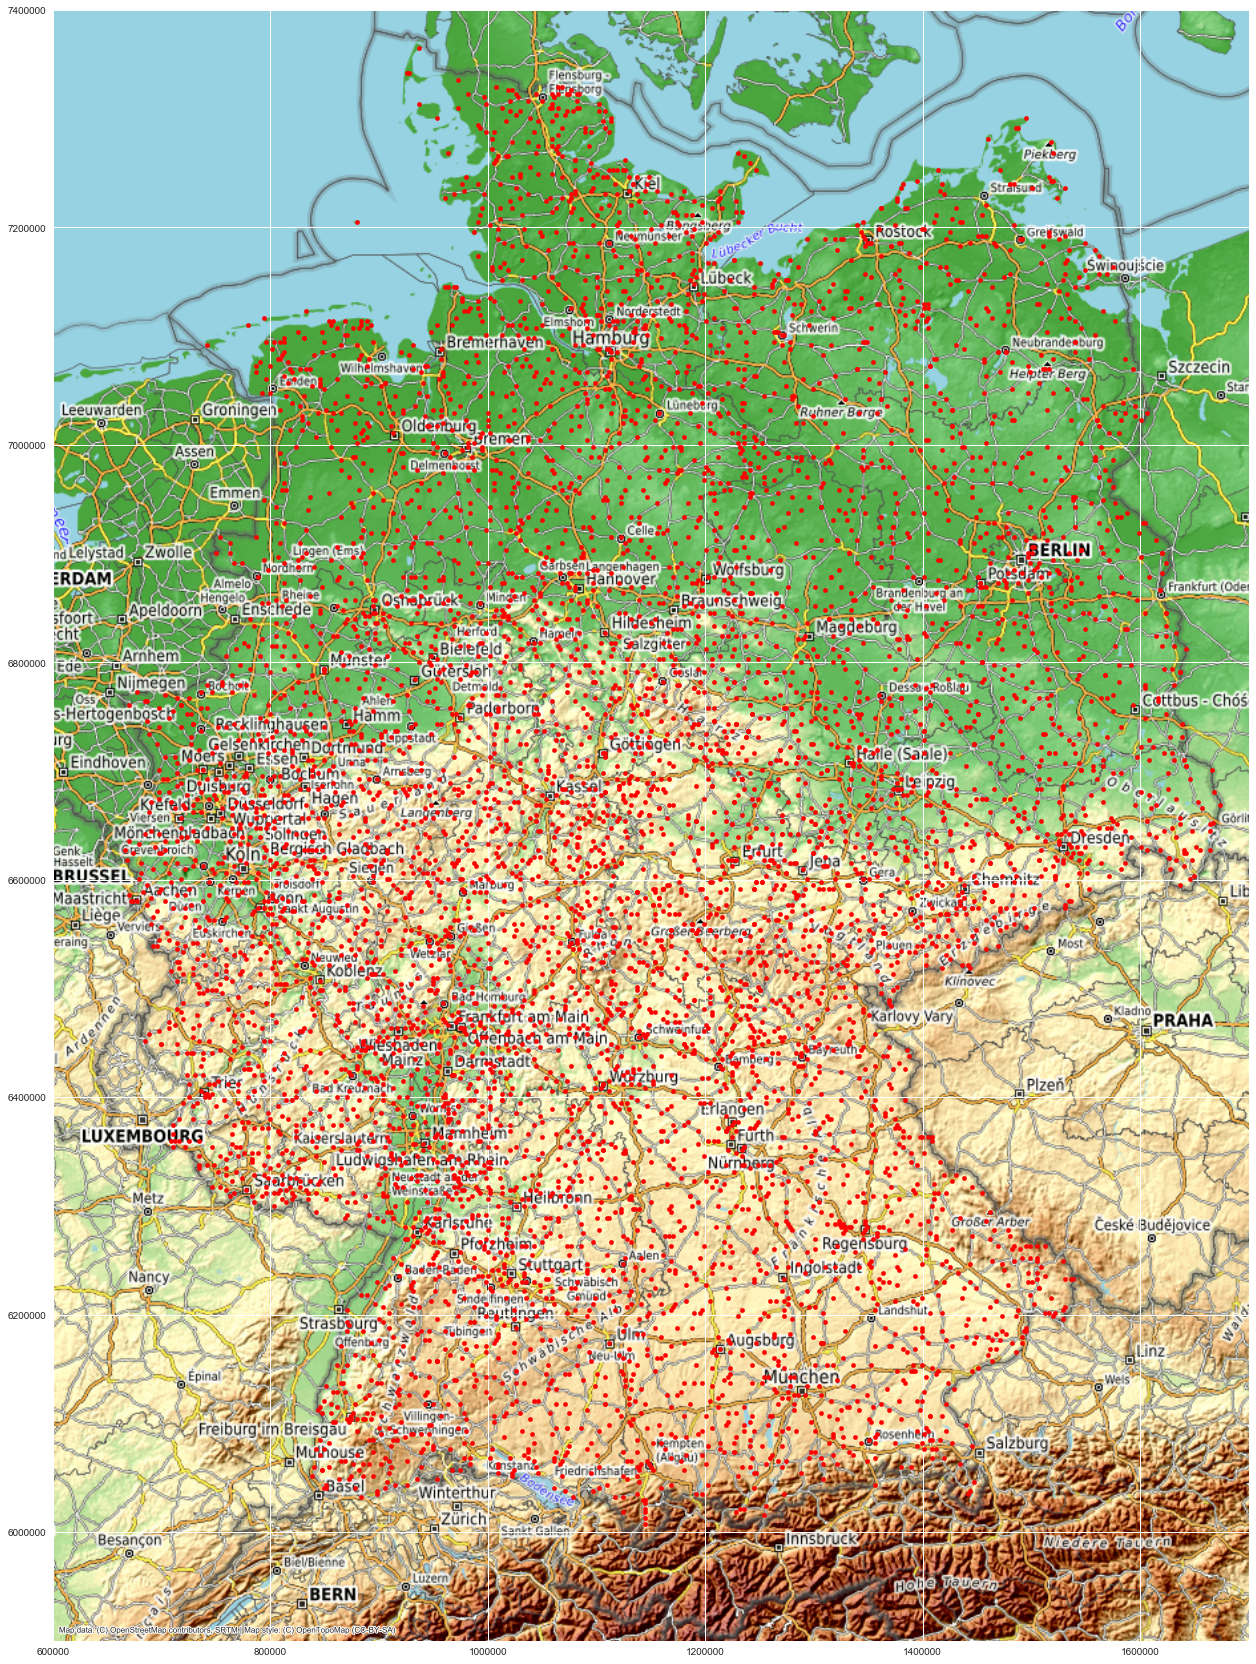

In [163]:
fig, ax = plt.subplots(figsize=(30, 30))
extent = (600000, 1700000, 5900000, 7400000)
gdf_trans.plot(ax=ax, color='red', markersize=20.0)
ax.axis(extent)
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap)

plt.savefig(os.path.join(p_cwd, "output", "images", "map_phen_stat_de.jpg"), dpi=300, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format='jpg',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
